<a href="https://colab.research.google.com/github/maryawamaitha/Data-Visualization-Portfolio-Projects/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import glob

files = glob.glob("states*.csv")

df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)



In [23]:
us_census = pd.concat(df_list)
us_census.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


In [24]:
#Drop the index column
us_census.drop(columns = ['Unnamed: 0'], inplace = True)


In [25]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"$53,017.75",1534595M_1558931F
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"$53,885.61",1439862M_1453125F
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"$45,285.80",2164208M_2233145F
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"$44,957.99",2261156M_2364097F
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"$49,181.97",650081M_679019F


In [26]:
#Omit the dollar sign
us_census['Income'] = us_census['Income'].str.replace('$', '', regex = True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"53,017.75",1534595M_1558931F
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"53,885.61",1439862M_1453125F
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"45,285.80",2164208M_2233145F
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"44,957.99",2261156M_2364097F
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"49,181.97",650081M_679019F


In [27]:
# Split the column into those two new columns using str.split and separating out those results.
new =us_census['GenderPop'].str.split('_',n = 1, expand = True)


In [28]:
us_census["Men"]= new[0]
us_census["Women"]= new[1]
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"53,017.75",1534595M_1558931F,1534595M,1558931F
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"53,885.61",1439862M_1453125F,1439862M,1453125F
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"45,285.80",2164208M_2233145F,2164208M,2233145F
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"44,957.99",2261156M_2364097F,2261156M,2364097F
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"49,181.97",650081M_679019F,650081M,679019F


In [29]:
# There is still an M or an F character in each entry! We should remove those before we convert.
us_census['Men'] = us_census['Men'].str.replace('M', '', regex = True)
us_census['Women'] = us_census['Women'].str.replace('F', '', regex = True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"53,017.75",1534595M_1558931F,1534595,1558931
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"53,885.61",1439862M_1453125F,1439862,1453125
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"45,285.80",2164208M_2233145F,2164208,2233145
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"44,957.99",2261156M_2364097F,2261156,2364097
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"49,181.97",650081M_679019F,650081,679019


In [30]:
#Drop the GenderPop column
us_census.drop(columns = ['GenderPop'], inplace = True)


In [31]:
# Convert both of the columns into numerical datatypes.
us_census['Women'] = pd.to_numeric(us_census['Women'])
us_census['Men'] = pd.to_numeric(us_census['Men'])


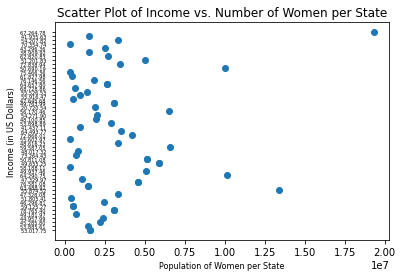

In [49]:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.rc('axes', labelsize=8)
plt.rc('ytick', labelsize=5)
plt.show()


In [33]:
us_census['Women'].unique()

array([ 1558931.,  1453125.,  2233145.,  2364097.,   679019.,       nan,
         543273.,  2455167.,   419713.,  3331859., 13367298.,  1444150.,
        4561386.,  1051703., 10131373.,  5049925.,   353677.,  5913084.,
        5123362.,   696428.,   806083.,  6556862.,  3333382.,   318031.,
        4195682.,  3497739.,   937789.,  2890732.,  1942789.,  1990780.,
        6534215.,  1869213.,  3081445.,   939759.,  1390901.,   670717.,
        2630239.,  1841615.,   478041.,   340810., 10045763.,  3455936.,
        5038598.,  2727005.,  1536358.,  2489527.,   349215.,  3342840.,
        1506295., 19334329.])

In [34]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print(us_census['Women'])

0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


In [35]:
#Check for duplicates
census = us_census.drop_duplicates()
census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"53,017.75",1534595,1558931.0
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,NaN,"53,885.61",1439862,1453125.0
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"45,285.80",2164208,2233145.0
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"44,957.99",2261156,2364097.0
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"49,181.97",650081,679019.0
5,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,"78,765.40",2872643,3057895.0
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"59,125.27",510388,543273.0
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"46,296.81",2322409,2455167.0
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"51,805.41",423477,419713.0
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"47,328.08",3167756,3331859.0


In [41]:
# Replace the missing values with zero
census['Pacific'] = census['Pacific'].fillna('0')
census

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Iowa,3093526,5.30%,87.72%,3.26%,0.29%,1.70%,0.06%,"53,017.75",1534595,1558931.0
1,Kansas,2892987,11.64%,75.96%,6.57%,0.73%,2.33%,0,"53,885.61",1439862,1453125.0
2,Kentucky,4397353,3.22%,85.23%,8.27%,0.17%,1.13%,0.05%,"45,285.80",2164208,2233145.0
3,Louisiana,4625253,4.87%,54.98%,36.33%,0.48%,1.67%,0.04%,"44,957.99",2261156,2364097.0
4,Maine,1329100,1.43%,93.71%,1.13%,0.79%,0.97%,0.02%,"49,181.97",650081,679019.0
5,Maryland,5930538,8.47%,52.68%,30.68%,0.20%,5.33%,0.04%,"78,765.40",2872643,3057895.0
0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,"59,125.27",510388,543273.0
1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,"46,296.81",2322409,2455167.0
2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,"51,805.41",423477,419713.0
3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,"47,328.08",3167756,3331859.0
